In [2]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import RobustScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

In [4]:
stock = pd.read_csv("gold_train.csv")
test = pd.read_csv("gold_test.csv")
mean_open = test['Open'].mean()
test['Open'].fillna(value = mean_open, inplace = True)
mean_low = test['Low'].mean()
test['Low'].fillna(value = mean_low, inplace = True)

In [5]:
meanopen = stock["Open"].mean()
medianopen = stock["Open"].median()
modeopen = stock["Open"].mode().iloc[0]

print("Mean:", meanopen)
print("Median:", medianopen)
print("Mode:", modeopen)

Mean: 1926.7902743142142
Median: 1944.4
Mode: 1661.8


In [6]:
meanhigh = stock["High"].mean()
medianhigh = stock["High"].median()
modehigh = stock["High"].mode().iloc[0]

print("Mean:", meanhigh)
print("Median:", medianhigh)
print("Mode:", modehigh)

Mean: 1935.5892768079802
Median: 1955.0
Mode: 1667.0


In [7]:
meanlow = stock["Low"].mean()
medianlow = stock["Low"].median()
modelow = stock["Low"].mode().iloc[0]

print("Mean:", meanlow)
print("Median:", medianlow)
print("Mode:", modelow)

Mean: 1919.207481296758
Median: 1934.6
Mode: 1953.0


In [8]:
meanclose = stock["Close"].mean()
medianclose = stock["Close"].median()
modeclose = stock["Close"].mode().iloc[0]

print("Mean:", meanclose)
print("Median:", medianclose)
print("Mode:", modeclose)

Mean: 1927.2478802992518
Median: 1942.7
Mode: 1952.4


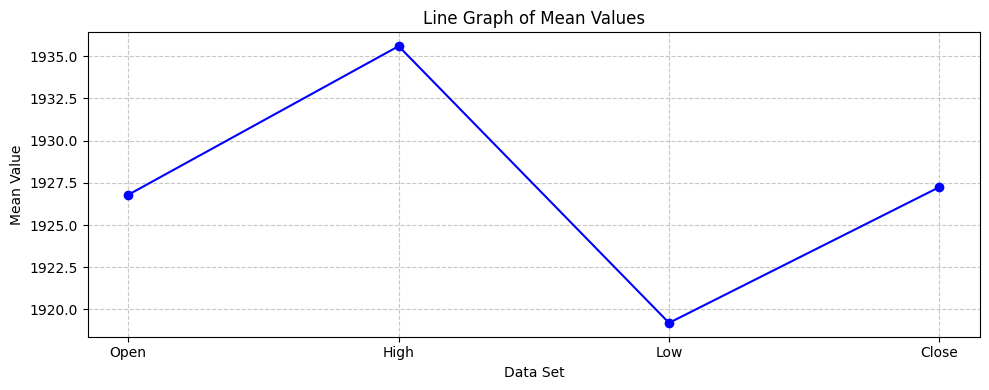

In [10]:
means = [meanopen,meanhigh,meanlow,meanclose]

plt.figure(figsize=(10,4))
plt.plot(range(len(means)), means, marker='o', linestyle='-', color='b')
plt.xticks(range(len(means)), ['Open','High','Low','Close'])
plt.xlabel('Data Set')
plt.ylabel('Mean Value')
plt.title('Line Graph of Mean Values')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

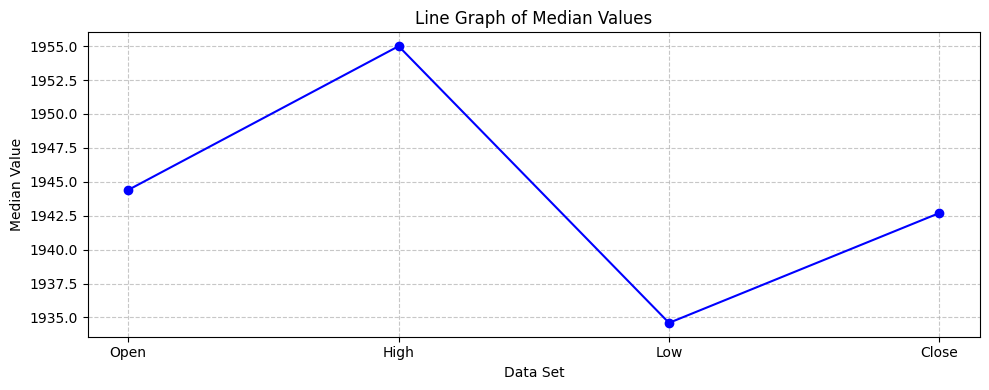

In [11]:
medians = [medianopen,medianhigh,medianlow,medianclose]

plt.figure(figsize=(10,4))
plt.plot(range(len(medians)), medians, marker='o', linestyle='-', color='b')
plt.xticks(range(len(medians)), ['Open','High','Low','Close'])
plt.xlabel('Data Set')
plt.ylabel('Median Value')
plt.title('Line Graph of Median Values')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

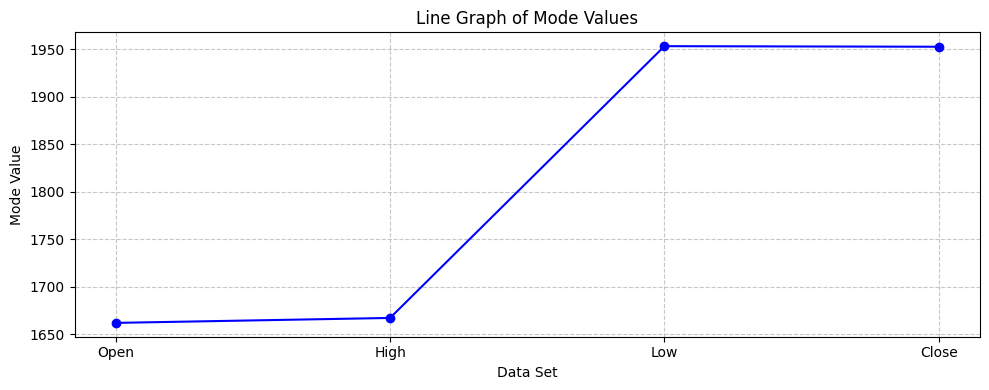

In [12]:
modes = [modeopen,modehigh,modelow,modeclose]

plt.figure(figsize=(10, 4))
plt.plot(range(len(modes)), modes, marker='o', linestyle='-', color='b')
plt.xticks(range(len(modes)), ['Open','High','Low','Close'])
plt.xlabel('Data Set')
plt.ylabel('Mode Value')
plt.title('Line Graph of Mode Values')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

<Figure size 1200x600 with 0 Axes>

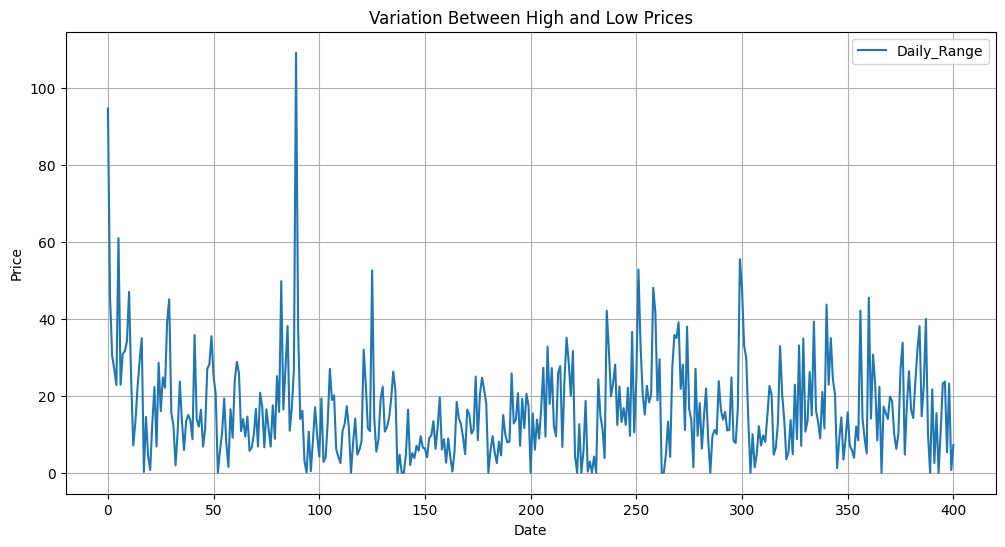

In [13]:

stock['Daily_Range'] = stock['High'] - stock['Low']
test['Daily Range'] = test['High'] - test['Low']
plot_cols = ['Daily_Range']

plt.figure(figsize=(12, 6))
stock[plot_cols].plot(kind='line', figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Price')

if len(plot_cols) == 2:
    plt.lines[0].set_label('High')
    plt.lines[1].set_label('Low')

plt.title('Variation Between High and Low Prices')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Daily_Range
0,"Apr 12, 2024",2377.3,2429.0,2334.3,2356.2,2356.2,94.7
1,"Apr 11, 2024",2341.5,2376.3,2330.6,2354.8,2354.8,45.7
2,"Apr 10, 2024",2346.6,2358.1,2327.7,2329.6,2329.6,30.4
3,"Apr 09, 2024",2337.8,2364.7,2337.8,2343.5,2343.5,26.9
4,"Apr 08, 2024",2325.6,2341.8,2319.0,2331.7,2331.7,22.8


In [15]:
stock['Date'] = pd.to_datetime(stock['Date'])
stock.set_index(['Date'],inplace=True)
test['Date'] = pd.to_datetime(test['Date'])
test.set_index(['Date'],inplace=True)

In [16]:
stock.head()

,Open,High,Low,Close,Adj Close,Daily_Range
Date,,,,,,
2024-04-12,2377.3,2429.0,2334.3,2356.2,2356.2,94.7
2024-04-11,2341.5,2376.3,2330.6,2354.8,2354.8,45.7
2024-04-10,2346.6,2358.1,2327.7,2329.6,2329.6,30.4
2024-04-09,2337.8,2364.7,2337.8,2343.5,2343.5,26.9
2024-04-08,2325.6,2341.8,2319.0,2331.7,2331.7,22.8


In [17]:
stock['Volatility'] = (stock['High'] - stock['Low'])/(stock['Open'])
test['Volatility'] = (test['High'] - test['Low'])/test['Open']

In [18]:
stock.head()

,Open,High,Low,Close,Adj Close,Daily_Range,Volatility
Date,,,,,,,
2024-04-12,2377.3,2429.0,2334.3,2356.2,2356.2,94.7,0.039835
2024-04-11,2341.5,2376.3,2330.6,2354.8,2354.8,45.7,0.019517
2024-04-10,2346.6,2358.1,2327.7,2329.6,2329.6,30.4,0.012955
2024-04-09,2337.8,2364.7,2337.8,2343.5,2343.5,26.9,0.011507
2024-04-08,2325.6,2341.8,2319.0,2331.7,2331.7,22.8,0.009804


In [19]:
stock['Volatility'] = stock['Volatility'].shift(1)
test['Volatility'] = test['Volatility'].shift(1)

In [20]:
stock.head()

,Open,High,Low,Close,Adj Close,Daily_Range,Volatility
Date,,,,,,,
2024-04-12,2377.3,2429.0,2334.3,2356.2,2356.2,94.7,NaN
2024-04-11,2341.5,2376.3,2330.6,2354.8,2354.8,45.7,0.039835
2024-04-10,2346.6,2358.1,2327.7,2329.6,2329.6,30.4,0.019517
2024-04-09,2337.8,2364.7,2337.8,2343.5,2343.5,26.9,0.012955
2024-04-08,2325.6,2341.8,2319.0,2331.7,2331.7,22.8,0.011507


In [21]:
correlation = stock.corr()
print(correlation)

                 Open      High       Low     Close  Adj Close  Daily_Range  \
Open         1.000000  0.997193  0.997772  0.995332   0.995332     0.170763   
High         0.997193  1.000000  0.995847  0.997217   0.997217     0.221943   
Low          0.997772  0.995847  1.000000  0.997652   0.997652     0.132247   
Close        0.995332  0.997217  0.997652  1.000000   1.000000     0.172314   
Adj Close    0.995332  0.997217  0.997652  1.000000   1.000000     0.172314   
Daily_Range  0.170763  0.221943  0.132247  0.172314   0.172314     1.000000   
Volatility   0.033298  0.052460  0.025124  0.039691   0.039691     0.310859   

             Volatility  
Open           0.033298  
High           0.052460  
Low            0.025124  
Close          0.039691  
Adj Close      0.039691  
Daily_Range    0.310859  
Volatility     1.000000  


In [22]:
import warnings
warnings.filterwarnings("ignore")

import itertools
p=q=range (0,8)
d = range(0,2)
pdq = list(itertools.product (p, d, q))

store = {}
for param in pdq:
       try:
              model_arima = sm.tsa.arima.ARIMA (stock.Close, order = param)
              model_arima_fit = model_arima.fit()
              store[param] =  model_arima_fit.aic
              #print(param, model_arima_fit.aic)
       except:
              continue

sorted_dict = dict(sorted(store.items(), key=lambda item: item[1]))
print(sorted_dict)

{(2, 1, 6): 3364.043095392077, (3, 1, 6): 3366.0418199125215, (2, 1, 7): 3366.042059142213, (6, 1, 2): 3366.1100039559265, (7, 1, 2): 3367.658508222513, (3, 1, 7): 3367.9591400364416, (4, 1, 6): 3368.0314472472355, (6, 1, 3): 3368.039812357829, (7, 1, 3): 3368.4039654050293, (5, 1, 4): 3369.6358772595977, (6, 1, 4): 3369.6701244002115, (4, 1, 7): 3369.9237689439938, (3, 1, 5): 3370.16605729383, (4, 1, 5): 3370.3175350651472, (7, 1, 4): 3370.366802194435, (5, 1, 3): 3370.684468066912, (7, 1, 5): 3370.7149458943263, (6, 1, 7): 3371.1737982754353, (5, 1, 7): 3371.288528345144, (6, 1, 5): 3371.328306836989, (5, 1, 5): 3371.5653976931685, (5, 1, 6): 3374.0084998113107, (5, 1, 2): 3374.304690677015, (2, 1, 5): 3374.5628583620546, (0, 1, 5): 3375.1351307484156, (7, 1, 1): 3375.2474077497836, (4, 1, 4): 3375.2872832903504, (7, 1, 0): 3376.0495665375356, (2, 1, 2): 3376.350720586958, (0, 1, 6): 3376.906279185515, (2, 1, 3): 3376.9776609874793, (1, 1, 5): 3377.01091479575, (3, 1, 2): 3377.029423

In [23]:
endog = stock['Close']
exog = sm.add_constant(stock[['Open', 'High','Low']])

mod = sm.tsa.statespace.SARIMAX(endog=endog, exog=exog, order=(3,1,5), seasonal_order=(1,0,0,5))
model_fit = mod.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  401
Model:             SARIMAX(3, 1, 5)x(1, 0, [], 5)   Log Likelihood               -1305.042
Date:                            Sat, 13 Apr 2024   AIC                           2638.084
Time:                                    21:19:08   BIC                           2693.964
Sample:                                         0   HQIC                          2660.213
                                            - 401                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.374e-06   1.18e-05      0.201      0.841   -2.08e-05    2.56e-05
Open          -0.5773      0.035    -16.463      0.000      -0.646      -0.509
High           0.6897      0.024     28.599      0.000       0.642       0.737
Low            0.8829      0.022     41.039      0.000       0.841       0.925
ar.L1         -1.1153      2.371     -0.470      0.638      -5.763       3.533
ar.L2         -0.5828      3.255     -0.179      0.858      -6.962       5.797
ar.L3          0.2466      2.203      0.112      0.911      -4.072       4.565
ma.L1          0.1500      2.376      0.063      0.950      -4.506       4.806
ma.L2         -0.4768      0.986     -0.483      0.629      -2.410       1.456
ma.L3         -0.8439      0.947     -0.891      0.373      -2.700       1.012
ma.L4          0.1814      2.237      0.081      0.935      -4.202       4.565
ma.L5         -0.0075      0.176     -0.043      0.966      -0.352       0.337
ar.S.L5       -0.0959      0.063     -1.525      0.127      -0.219       0.027
sigma2        37.8326      2.343     16.145      0.000      33.240      42.425
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               817.31
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                            -0.12
Prob(H) (two-sided):                  0.03   Kurtosis:                        10.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.78e+21. Standard errors may be unstable.
"""

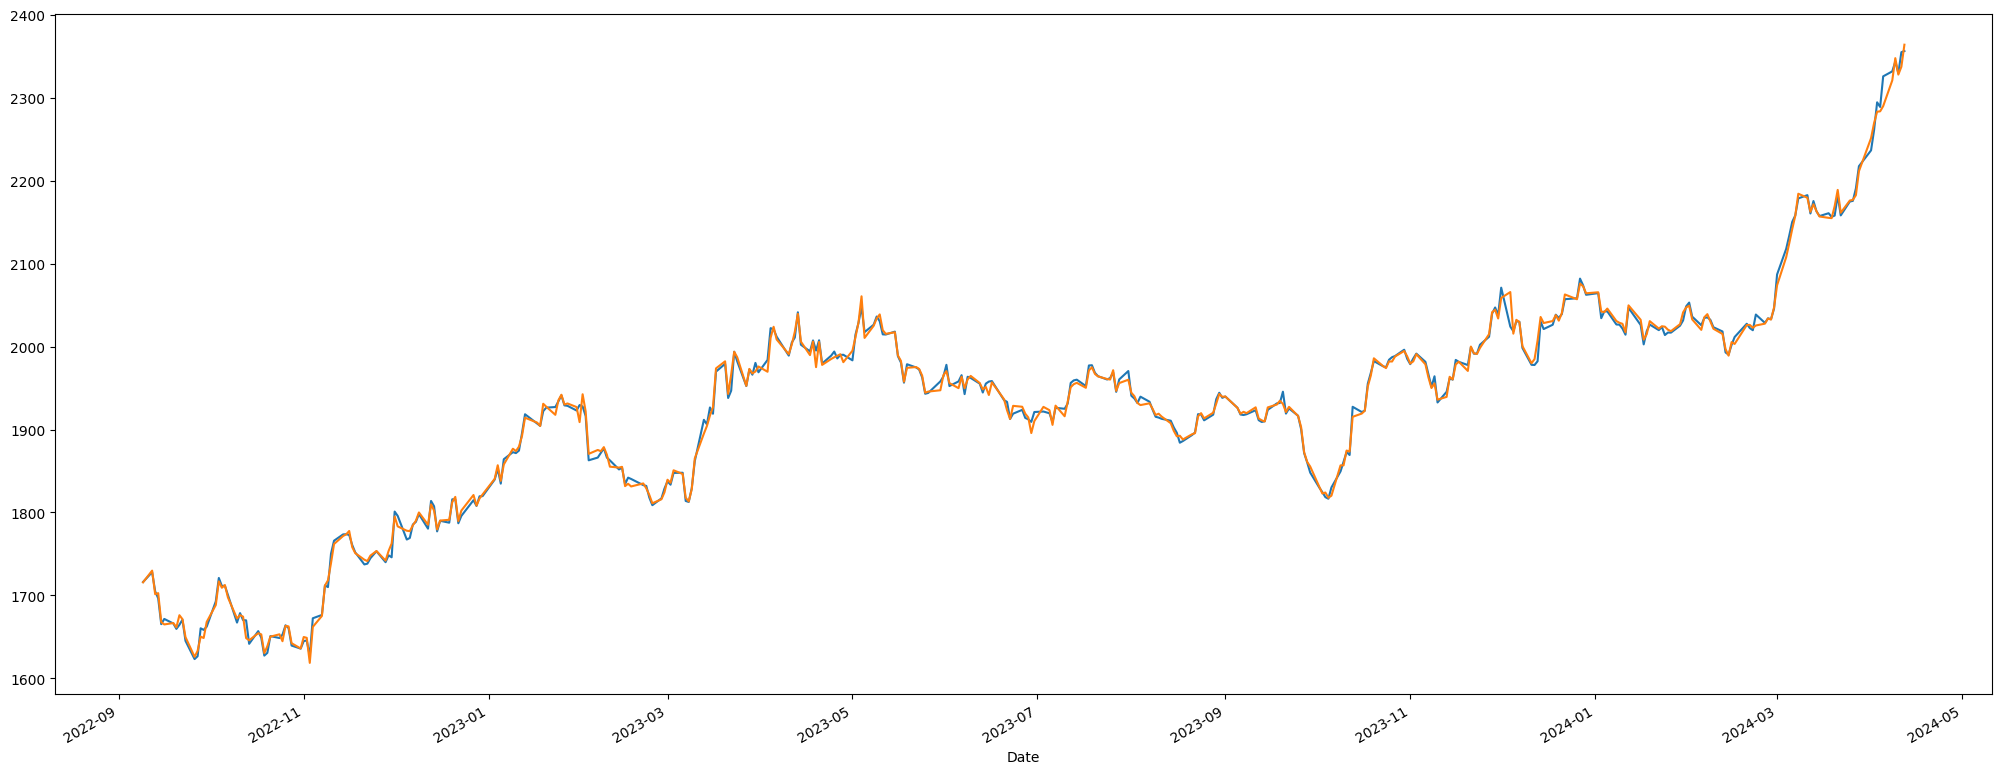

In [24]:
stock['Close'].plot(figsize=(25,10))
model_fit.fittedvalues.plot()
plt.show()

In [25]:
predict = model_fit.predict(start = 0,end =len(stock)-1,exog = sm.add_constant(stock[['Open','High','Low']]))
stock['Predicted'] = predict.values
stock.tail(5)

,Open,High,Low,Close,Adj Close,Daily_Range,Volatility,Predicted
Date,,,,,,,,
2022-09-15,1685.5,1686.0,1662.3,1665.4,1665.4,23.7,0.013973,1667.901723
2022-09-14,1698.7,1701.8,1696.5,1696.5,1696.5,5.3,0.014061,1702.798923
2022-09-13,1720.5,1720.5,1697.3,1705.0,1705.0,23.2,0.003120,1701.528396
2022-09-12,1727.4,1728.1,1727.4,1728.1,1728.1,0.7,0.013484,1729.935018
2022-09-09,1719.2,1720.0,1712.8,1716.2,1716.2,7.2,0.000405,1715.860133


In [26]:
stock['Residual'] = abs(stock['Close']-stock['Predicted'])
MAE = stock['Residual'].sum()/len(stock)
MAPE = (abs(stock['Residual'])/stock['Close']).sum()*100/len(stock)
print("MAE:", MAE)
print("MAPE:", MAPE)

MAE: 4.393011115339981
MAPE: 0.22752339745160013


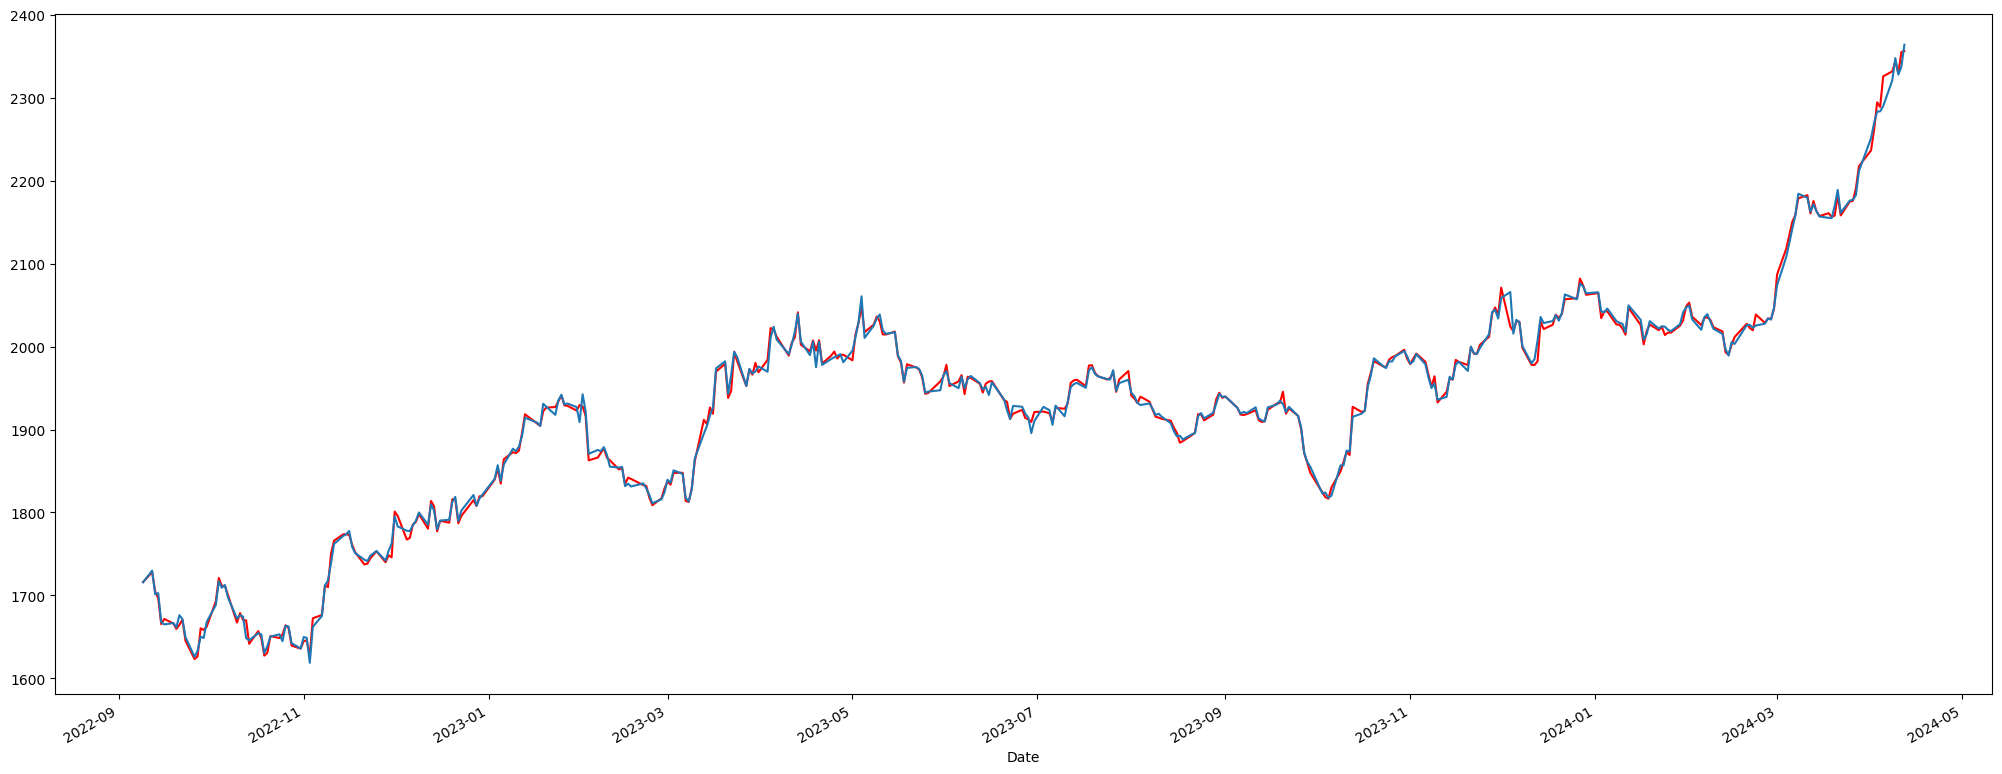

In [27]:
stock['Close'].plot(figsize=(25,10),color = 'red')
stock['Predicted'].plot()
plt.show()

In [28]:
predict_final = model_fit.predict(start = len(stock),end =len(stock)+len(test)-1,exog = sm.add_constant(test[['Open','High','Low']]))
test['Predicted'] = predict_final.values
test.tail(5)

,Open,High,Low,Close,Adj Close,Daily Range,Volatility,Predicted
Date,,,,,,,,
2022-04-20,1945.5,1953.6,1945.5,1952.3,1952.3,8.1,0.001236,1952.103655
2022-04-19,1973.8,1978.3,1945.7,1955.7,1955.7,32.6,0.004163,1952.956779
2022-04-18,1973.4,1997.1,1972.8,1982.9,1982.9,24.3,0.016516,1990.065676
2022-04-14,1977.2,1978.7,1963.0,1970.9,1970.9,15.7,0.012314,1966.570243
2022-04-13,1969.5,1981.0,1969.5,1981.0,1981.0,11.5,0.007941,1978.298066


In [ ]:
final['Close'] = predict_final.values
final.head()

,Id,Close
0,801,91.400456
1,802,91.370591
2,803,91.501813
3,804,91.300469
4,805,91.446973
